In [1]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.weight = np.zeros(1+X.shape[1])
        self.errors_ = []
        for i in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                pred = self.predict(xi)
                update = target-pred
                self.weight[1:]+= self.eta*(update)*xi
                self.weight[0]+= self.eta*(update)
                #print(str(update)+"-----------")
                error += int(update != 0.0)
            self.errors_.append(error)
        return self
    
    def predict(self, X):
        return np.where(self.act_func(X) >=0 ,1 , -1)
    
    def act_func(self, X):
        return self.weight[1:].dot(X.T)+self.weight[0]

In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

NameError: name 'classes' is not defined

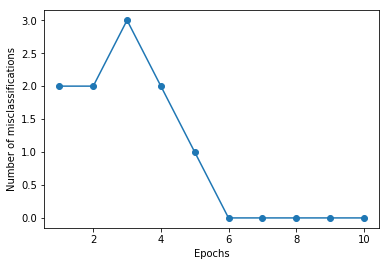

In [139]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [151]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [152]:
np.unique(y)

array([0, 1, 2])